# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')

In [3]:
#выведем общую информацию о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#выведем первые 5 строк  таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#выведем последние 10 строк таблицы
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


При визуальном просмотре бросается в глаза сразу 2 проблемы:

-  некорректное название столбца cityCenters_nearest

-  наличие пропусков в столбцах


In [8]:
# делаем корректным название столбцаcityCenters_nearest
data = data.rename(columns= {'cityCenters_nearest': 'city_centers_nearest'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


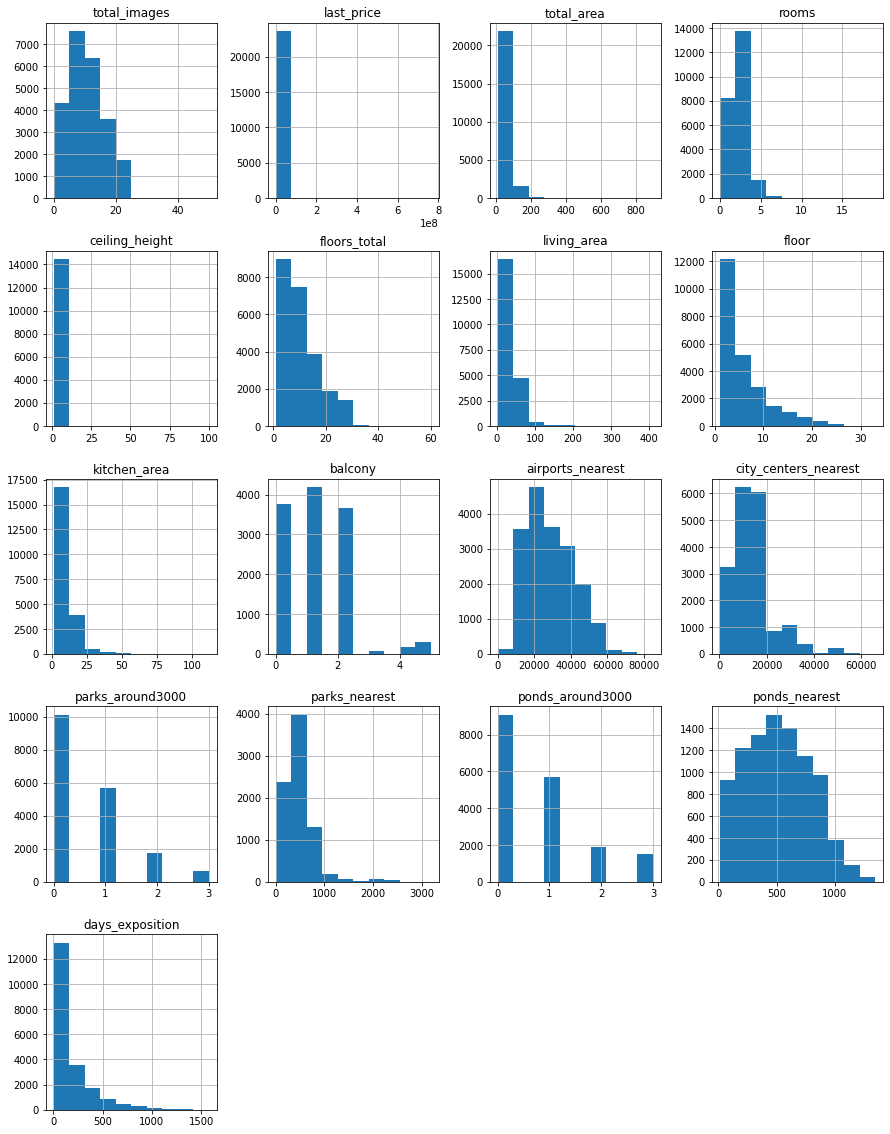

In [9]:
data.hist(figsize = (15,20));

### Выполните предобработку данных

In [10]:
#подсчет количества пропусков
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [11]:
#процент пропусков в колонках
data.isna().mean().sort_values(ascending = False)*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Больше всего пропусков имеется в столбце is_apartment.Я считаю, что пропуск в этой колонке связан с человеческим фактором.Скорее всего это квартира.Заменим пропущенные значения на False.

Пропуски в parks_nearest и ponds_nearest , на мой взгляд , появились из-за технической ошибки.Некооректная передача данных или сбой.Считаю возможным эти пропуски оставить, потому что корректно их заменить не получится


Пропуск в столбце balcony связан с тем, что человек, скорее всего не указал значение 0, считая пропуск и ноль одним значением.Таким образом пропуски в столбце balcony заменим на 0

Пропуск ceiling_height связан с  человеческим фактором, не внесли информацию в таблицу.Заменим на медианное значение. 

In [12]:
#меняем пропуски в столбце is_apartment  на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
#меняем пропуски в столбце balcony на 0

data['balcony'] = data['balcony'].fillna(0)


In [14]:
#меняем высоту потолков(столбец ceiling_height) на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
#посмотрим стат данные по столбцу
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [16]:
#заменим пропуски в 'living_area' на медианное значение
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

пропуски в столбцах ponds_around3000  и parks_around3000 логически невозможно изменить, если удалить,то потеряется значительная часть информации, поэтому оставим без изменения.Пропуски возможно связаны с техническим сбоем при передачи информации


In [17]:
#пропуски в столбце locality_name удаляем,без названия населенного пункта выявить какую-либо закономерность невозможно
data = data.dropna(subset = ['locality_name'])

количество пропусков floors_total мало, но количество этажей важная информация при определении на каком этаже находится квартира.Поэтому эти пропуски оставим без изменения


пропуски в days_exposition говорят о том, что квартира еще продается.Пропуски оставим без изменений


In [18]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Большой разброс между средней и медианой,возможно есть выбросы.Заменять на медианное значение считаю некорректным, оставляем пропуски


In [19]:
#посмотрим информацию о пропусках после всех замен
data.isna().sum().sort_values(ascending = False)

parks_nearest           15586
ponds_nearest           14565
airports_nearest         5534
city_centers_nearest     5511
ponds_around3000         5510
parks_around3000         5510
days_exposition          3180
kitchen_area             2269
floors_total               85
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [20]:
#еще раз выведем информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [21]:
#переведем 3 столбец в формат даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [22]:
#Изменим тип данных на int
data['balcony'].astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23650, dtype: int64

In [23]:
#посмотрим на уникальные значения  в столбце locality_name 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
#заменим слова деревня, поселок, платформа и т. д. на пропуски для дальнейшей работы с этими данными
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок ', 'коттеджный', 'городской'], '', regex=True))

In [25]:
#выведем уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{' Большая Ижора',
 ' Будогощь',
 ' Виллози',
 ' Кивеннапа Север',
 ' Лесное',
 ' Лесогорский',
 ' Мга',
 ' Назия',
 ' Новоселье',
 ' Павлово',
 ' Рощино',
 ' Свирьстрой',
 ' Советский',
 ' Счастье',
 ' Федоровское',
 ' Янино-1',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветин

In [26]:
# проверим наличие дубликатов после приведения названий к одному виду
data.duplicated().sum()

0

 Изменили в столбцах тип данных: 'balcony' на int и 'first_day_exposition' на date. Привели названия объектов(столбец 'locality_name') к одному виду.Теперь с этими данными можно работать и анализировать

### Добавьте в таблицу новые столбцы

In [27]:
#добавляем новый столбец с ценой квадратного метра
data['price_square_meter'] = data['last_price']/data['total_area'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [28]:
#добавляем новый столбец с днем публикации объявления
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [29]:
#добавляем новый столбец с месяцем публикации объявления
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [30]:
#добавляем новый столбец с годом публикации объявления
data['years_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [31]:
#создаем новый столбец по типу этажа квартиры.Напишем фукцию, которая будет этажи квартир делить на 3 категории:первый, 
# последний и другой
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другие'

data['type_floor'] = data.apply(type_floor,axis = 1)

In [32]:
#добавляем столбец с расстояние до центра(км)
data['distance_centers'] = (data['city_centers_nearest']/1000).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,type_floor,distance_centers
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другие,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другие,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другие,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другие,8.0


Были добавлены 6 столбцов:

    - цена квадратного метра('cost_square_meter')
    - день публикации объявления('day_publication')
    - месяц публикации объявления('month_publication')
    - год публикации объявления('years_publication')
    - тип этажа квартиры('type_floor')
    - расстояние до центра (км)('distance_centers')
    
   Эти столбцы помогут нам установить параметры, влияющие на стоимость квартиры


### Проведите исследовательский анализ данных

Изучим по отдельности каждый параметр и построим по ним гистограмму

4.1.1. Общая площадь('total_area')

In [33]:
#выведем стат данные
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

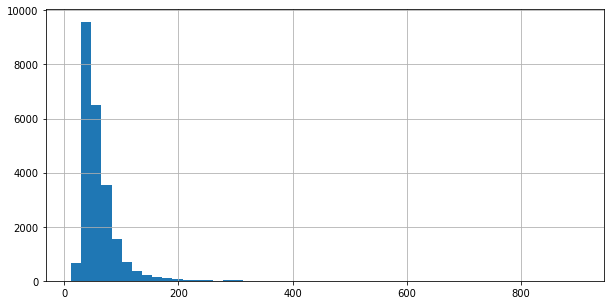

In [34]:
data['total_area'].hist(bins = 50,figsize = (10,5));

Максимальное значение 900, скорее всего это выброс.Гистаграмма показала,что максимальное количество квартир имеет площадь от 40 до 60 кв.м.

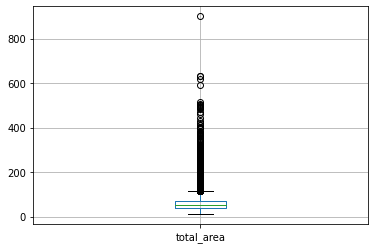

In [35]:
#строим "ящик с усами " для определения выбросов
data.boxplot(column = 'total_area');

На графике видно, что приблизительно больше 130 метров начинаются выбросы

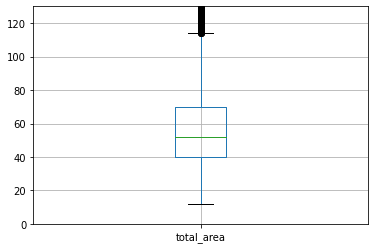

In [36]:
#построим график в пределах ylim(0,130)
import matplotlib.pyplot as plt
data.boxplot(column ='total_area')    
plt.ylim(0, 130);


"Ящик с усами" показал, что выше 113 метров начинаются выбросы

In [96]:
#код ревьюера
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

In [37]:


#удалим выбросы более 150 метров и посмотрим, какой процент они составляют.Оставляем 150 метров, потому что на мой взгляд
#это оптимальное значение, больше которого квартиры бывают больше крайне редко
new_data = data.loc[data['total_area'] <= 150]
new_data.shape[0] / data.shape[0]                                                                     


0.9762367864693446

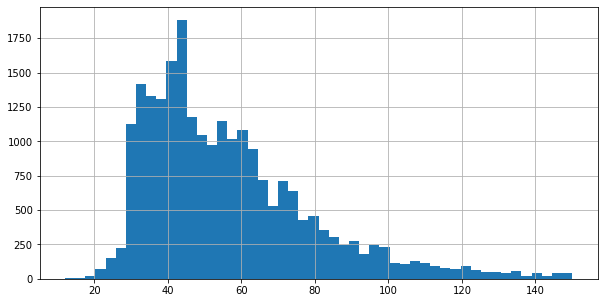

In [38]:
#построим гистогрмамму 

new_data['total_area'].hist(bins = 50,figsize = (10,5));

In [39]:
new_data['total_area'].value_counts()

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
127.30      1
78.65       1
47.13       1
122.40      1
55.06       1
Name: total_area, Length: 1865, dtype: int64

Вывод:Самые продаваемые квартиры площадью от 31 до 60 метров.Это однокомнатные и двухкомнатные.Наиболее продаваемые квартиры площадью 45 кв.метров

4.1.2. Жилая площадь('living_area')

In [40]:
#выведем стат данные
new_data['living_area'].describe()


count    23088.000000
mean        32.142349
std         14.813157
min          2.000000
25%         19.000000
50%         30.000000
75%         40.000000
max        128.000000
Name: living_area, dtype: float64

In [41]:
#оставим только те данные, где жилая площадь меньше или равна общей(где площади равны, это могут быть студии)

new_data = new_data.loc[(new_data ['living_area']) <= (new_data ['total_area'])]


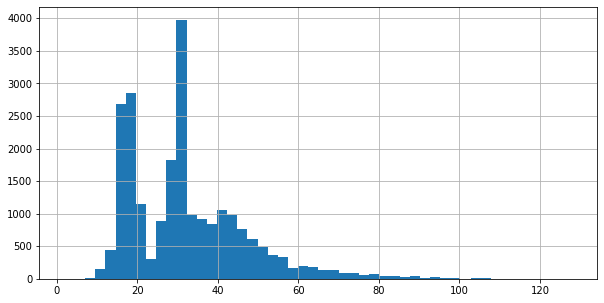

In [42]:
new_data['living_area'].hist(bins = 50,figsize = (10,5));

Гистограмма показывает, что наибольшее количество жилой площади находится в диапазоне 6-50 кв. метров

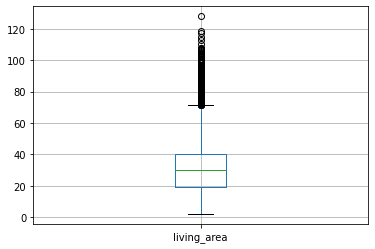

In [43]:
#строим "ящик с усами " для определения выбросов
new_data.boxplot(column = 'living_area');

"ящик с усами " показал, что выше 70 кв.метров-выбросы.

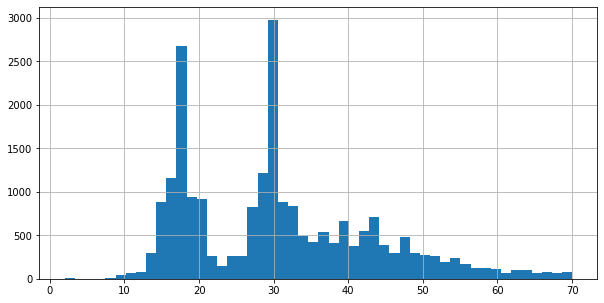

In [44]:
#создадим новую переменную living_area_finish,в нее войдут значения площади до 70 кв.метров
living_area_finish = new_data.loc[new_data['living_area']<=70]
living_area_finish['living_area'].hist(bins = 50,figsize = (10,5));

In [45]:
living_area_finish['living_area'].value_counts().head(10)

30.0    2352
18.0     882
17.0     674
16.0     485
20.0     479
28.0     422
31.0     381
19.0     329
32.0     319
29.0     318
Name: living_area, dtype: int64

Вывод:Наиболее продаваемые квартры с жилой площадью 30,18 и 17 кв.метров


4.1.3. Площадь кухни('kitchen_area')

In [46]:
#выведем стат данные
new_data['kitchen_area'].describe()

count    20883.000000
mean        10.207548
std          4.974142
min          1.300000
25%          7.000000
50%          9.000000
75%         11.680000
max         93.000000
Name: kitchen_area, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Оставляем данные, где площадь кухни меньше или равна общей🙂
</div>

In [47]:
#оставим только те данные, где площадь кухни не превышает общую площадь

new_data = new_data.loc[(new_data ['kitchen_area']) <= (new_data ['total_area'])]

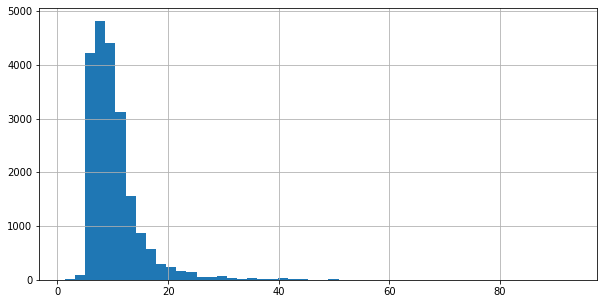

In [48]:
new_data['kitchen_area'].hist(bins = 50,figsize = (10,5));

Согласно гистограмме самые продаваемые квартиры с площадью кухни 5-12 кв. метров.На изображении видно, что есть значения больше 20 метров.Выбросами это не считаю, потому что есть квартиры с большой кухней

In [49]:
new_data['kitchen_area'].value_counts().head()

6.0     1297
10.0    1252
8.0     1107
9.0     1100
7.0     1062
Name: kitchen_area, dtype: int64

Вывод:Самые продаваемые кухни с площадью от 6 до 10 кв. метров.Самые популярные это 6 и 10 кв метров.

4.1.4. Цена объекта('last_price')

In [50]:

new_data['last_price'] = (new_data['last_price']/1000000).round(2)

In [51]:
new_data['last_price'].describe()



count    20883.000000
mean         5.758144
std          4.551857
min          0.010000
25%          3.480000
50%          4.600000
75%          6.600000
max        124.000000
Name: last_price, dtype: float64

In [52]:
#в стоимости вызывает вопрос цена о рублей,цена в 124 млн допускаю(Центр Санкт-Петербурга, большая по площади квартира)
#предлагаю оставить квартиры с ценой более 1.5 млн рублей как минимальную
new_data = new_data.loc[(new_data ['last_price'])>= 1.5]

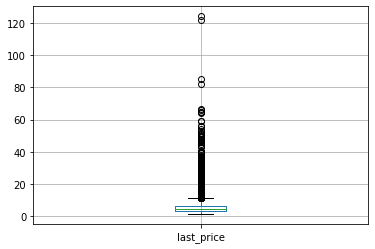

In [53]:
new_data.boxplot(column = 'last_price');

Гистограмма и "ящик с усами" нечитаемы, увеличим размеры

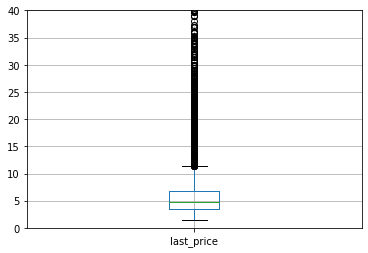

In [54]:
#построим график в пределах ylim(0,40)
import matplotlib.pyplot as plt
new_data.boxplot(column ='last_price')    
plt.ylim(0, 40);

На изображении видно, что стоимость свыше 12 млн рублей это выбросы.Создадим новую переменную со стоимостью до 12 млн.рублей 
и построим новую гистограмму


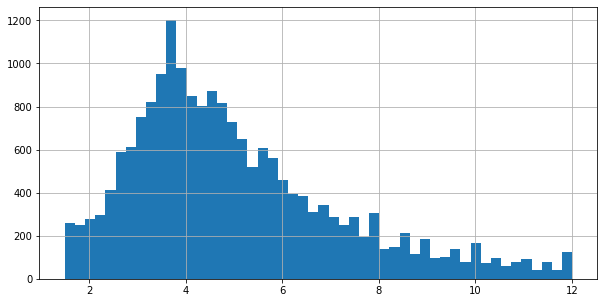

In [55]:
last_price_finish = new_data.loc[new_data['last_price']<=12]
last_price_finish['last_price'].hist(bins = 50,figsize = (10,5));

In [56]:
last_price_finish['last_price'].value_counts().head()

4.5    328
3.5    274
4.0    271
4.2    258
4.3    254
Name: last_price, dtype: int64

Вывод:квартиры в диапазоне от 3.5 млн до 4.5 млн рублей самые продаваемые.Самые продаваемые квартиры стоят 4.5 млн. рублей

4.1.5. Количество комнат('rooms')

In [57]:
new_data['rooms'].describe()

count    20344.000000
mean         2.036424
std          0.936829
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [58]:
new_data.groupby('rooms')['rooms'].count()


rooms
1    6953
2    7040
3    5233
4     932
5     156
6      22
7       7
8       1
Name: rooms, dtype: int64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Оставляем данные, где количество комнат не превышает 6 🙂
</div>

In [59]:
#группировка показала,что есть квартиры сколичеством комнат больше.Данные с количеством комант 7 и далее предлагаю удалить.
#6 комнатные квартиры могут быть в Санкт-Петербурге(комнаты общежития, объединенные в одну квартиру).
# 0 комнат оставим,это могут быть квартры студии
new_data = new_data.loc[data['rooms']<7]

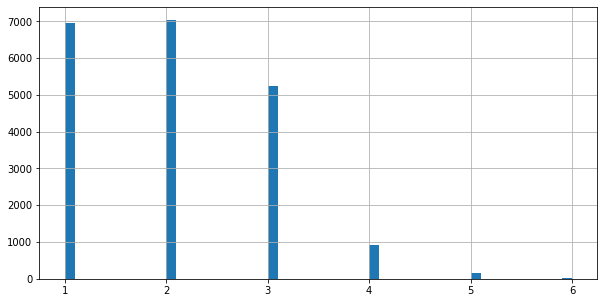

In [60]:
new_data['rooms'].hist(bins = 50,figsize = (10,5));

Вывод: Данные на гистограмме показывают, что продают больше всего однокомнатных и двухкомнатных квартир.Продажи приблизительно находятся на одном уровне.

На третьем месте стоят 3 - комнатные квартиры

4.1.6. Высота потолков ('ceiling_height')

In [61]:
new_data['ceiling_height'].describe()

count    20336.000000
mean         2.717160
std          1.005823
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

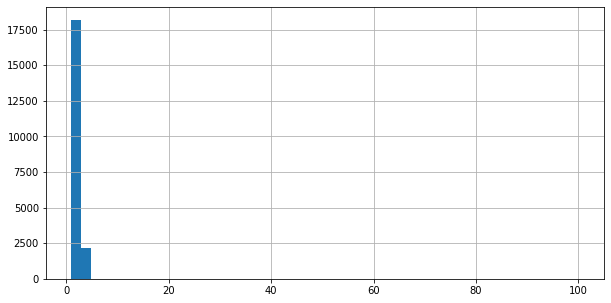

In [62]:
new_data['ceiling_height'].hist(bins = 50,figsize = (10,5));

In [63]:
new_data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.61,   3.2 ,   3.25,
         3.45,   2.77,   2.64,   2.57,   4.15,   4.  ,   2.47,   2.84,
         3.1 ,   3.4 ,   3.5 ,   2.72,   2.54,   2.51,   2.78,   2.76,
         2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.85,
         3.3 ,   2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,
         3.55,   3.62,   2.53,   2.73,   2.96,   2.46,   2.74,   2.95,
         4.06,   2.94,   2.79,   3.54,   3.53,   2.83,   2.4 ,   3.38,
         3.01,   3.65,   3.18,   2.71,   3.35,   2.3 ,   2.48,   2.62,
         3.57,   2.82,   3.98,   3.12,   2.63,   3.83,   3.52,   3.75,
         2.88,   3.66,   4.19,   3.95,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.68,   3.07,   3.37,   3.09,   3.16,   3.26,
         3.34,   2.81,   3.44,   2.97,   4.37,   2.68,   3.9 ,   3.27,
        25.  ,   2.93,   3.46,  24.  ,   3.47,  27.  ,   3.63,   3.33,
      

In [64]:
# В столбце 'ceiling_height' присутствуют аномальные значения, возможно человек просто не там поставил запятую.
# Восстановим корректное значение, зазделив высоту потолка свыше 20 метров на 10
new_data.loc[new_data['ceiling_height'] >= 20,'ceiling_height'] = new_data['ceiling_height']/10


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Оставляем данные, где высота потолка не превышает 6 метров 🙂
</div>

In [65]:
#В столбце 'ceiling_height' присутствуют аномальные значения,с высотой потолка больше 6 метров.Удалим данные 
#с этим аномальным значением

new_data = new_data.loc[new_data ['ceiling_height']<6]



In [66]:
new_data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.61, 3.2 , 3.25, 3.45, 2.77, 2.64, 2.57, 4.15, 4.  ,
       2.47, 2.84, 3.1 , 3.4 , 3.5 , 2.72, 2.54, 2.51, 2.78, 2.76, 2.58,
       3.7 , 2.52, 2.87, 2.66, 2.59, 2.  , 2.85, 3.3 , 2.45, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.62, 2.53, 2.73, 2.96, 2.46, 2.74,
       2.95, 4.06, 2.94, 2.79, 3.54, 3.53, 2.83, 2.4 , 3.38, 3.01, 3.65,
       3.18, 2.71, 3.35, 2.3 , 2.48, 2.62, 3.57, 2.82, 3.98, 3.12, 2.63,
       3.83, 3.52, 3.75, 2.88, 3.66, 4.19, 3.95, 3.24, 4.8 , 4.5 , 4.2 ,
       3.36, 3.68, 3.07, 3.37, 3.09, 3.16, 3.26, 3.34, 2.81, 3.44, 2.97,
       4.37, 2.68, 3.9 , 3.27, 2.93, 3.46, 3.47, 3.63, 3.33, 3.32, 1.2 ,
       4.1 , 2.86, 3.08, 3.17, 3.14, 3.28, 3.67, 3.04, 5.5 , 3.84, 3.23,
       3.02, 3.21, 3.78, 4.3 , 3.06, 3.39, 4.4 , 3.22, 3.56, 3.85, 3.93,
       3.42, 3.31, 3.88, 1.75, 4.25, 2.25, 2.91, 4.7 , 2.26, 2.89, 2.69,
       2.49, 3.48, 2.98, 1.  , 3.49, 3.59])

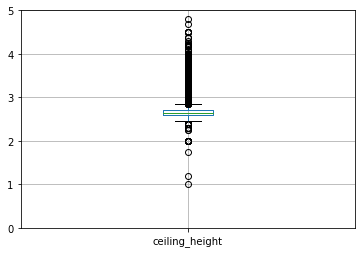

In [67]:
#построим "ящик  с усиками" и посмотрим наиболее характерные высоты потолков при продаже.Значения ограничем 5 метрами
new_data.boxplot(column = 'ceiling_height')
plt.ylim(0, 5);

In [68]:
new_data['ceiling_height'].value_counts().head(10)

2.65    8045
2.50    3152
2.60    1507
2.70    1423
3.00     957
2.55     911
2.80     902
2.75     823
3.20     238
3.10     171
Name: ceiling_height, dtype: int64

Вывод:Наибольшее количество объявлений  с высотой потолка от 2.5 метра до 3 метров.

4.1.7. Тип этажа квартиры ('type_floor')

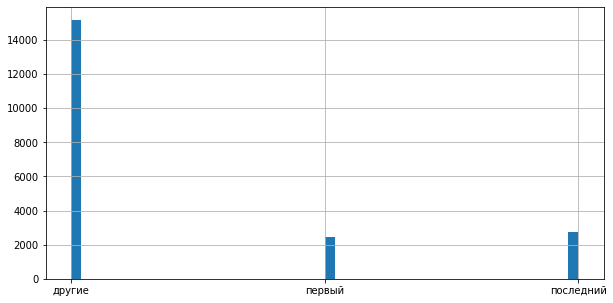

In [69]:
new_data['type_floor'].hist(bins = 50,figsize = (10,5));

Вывод:Наибольшее количество объявлений с продажей квартир не на первом и последнем этажах.

4.1.8. Общее количество этажей ('floors_total')

In [70]:
new_data['floors_total'].describe()

count    20295.000000
mean        10.823011
std          6.550192
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

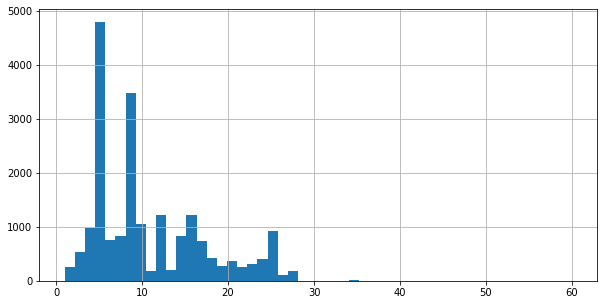

In [71]:
new_data['floors_total'].hist(bins = 50,figsize = (10,5));

In [72]:
new_data['floors_total'].value_counts().head()

5.0     4800
9.0     3474
12.0    1225
16.0    1213
10.0    1053
Name: floors_total, dtype: int64

Вывод: Больше всего квартир продается на 5 и 9 этажах.

4.1.9. Расстояние до центра города в метрах('city_centers_nearest')

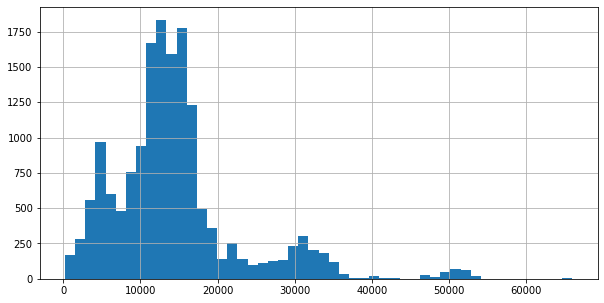

In [73]:
new_data['city_centers_nearest'].hist(bins = 50,figsize = (10,5));

Вывод:Больше всего объявлений о продаже квартир, находящихся на расстоянии 11000-15000 метров от центра города и всплекс в 5000 метров от центра города

4.1.10. Расстояние до ближайшего парка('parks_nearest')

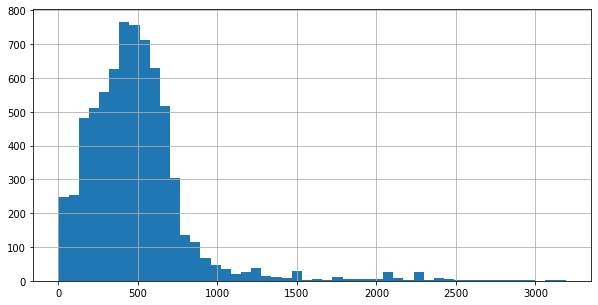

In [74]:
new_data['parks_nearest'].hist(bins = 50,figsize = (10,5));

Вывод:Наибольшее количество квартир в продаже с расстоянием до парка 400-600 метров

In [75]:
#посмотрим на процент потери данных после удаления выбросов
new_data.shape[0] / data.shape[0]


0.8597040169133192

после удаления выбросов было потеряно менее 1 % данных


    Проведя исследовательский анализ данных по группе параметров можно сделать следующие выводы:
    
    1. Самые продаваемые квартиры площадью от 31 до 60 метров.Это однокомнатные и двухкомнатные.Наиболее продаваемые квартиры площадью 45 кв.метров
    2. Наиболее продаваемые квартры с жилой площадью 30,18 и 17 кв.метров
    3. Самые продаваемые кухни с площадью от 5 до 12 кв. метров.Самые популярные это 6 и 10 кв метров
    4. Квартиры в диапазоне от 3.5 млн до 4.5 млн рублей самые продаваемые.Самые продаваемые квартиры стоят 4.5 млн. рублей
    5. Больше всего однокомнатных и двухкомнатных квартир.Продажи приблизительно находятся на одном уровне.
    6. Наибольшее количество объявлений с высотой потолка от 2.5 метра до 3 метров.
    7. Наибольшее количество объявлений с продажей квартир не на первом и последнем этажах.
    8. Больше всего квартир продается на 5 и 9 этажах.
    9. Больше всего объявлений о продаже квартир, находящихся на расстоянии 11000-15000 метров от центра города и всплекс в   5000 метров от центра города
    10.Наибольшее количество квартир в продаже с расстоянием до парка 400-600 метров

4.2.Теперь посмотрим как быстро продавались квартиры

In [76]:
new_data['days_exposition'].describe()

count    17608.000000
mean       182.960586
std        220.663975
min          1.000000
25%         44.000000
50%         99.000000
75%        234.000000
max       1580.000000
Name: days_exposition, dtype: float64

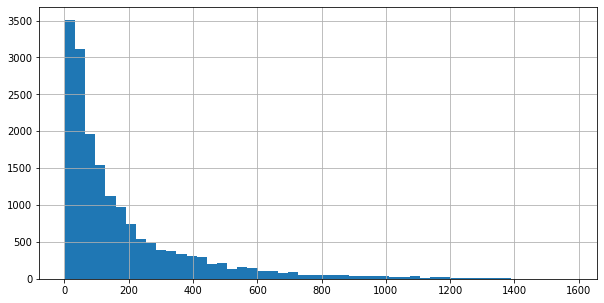

In [77]:
new_data['days_exposition'].hist(bins = 50,figsize = (10,5));

Вывод:

1. Самая долгая продажа квартиры составила 1580 дней.Средняя продажа квартир составляет 95 дней.Это медианное значение, которое не подвержено выбросам и аномальным значение.
2. Быстрые продажи - до 45 дней(1 квартиль)
3. Долгие продажи  - после 231 дня(после 3 квартили)


4.3. Теперь изучим какие факторы больше всего влияют на общую стоимость объекта.Для этого построим графики по кажному из факторов

4.3.1. Общая площадь ('total_area')

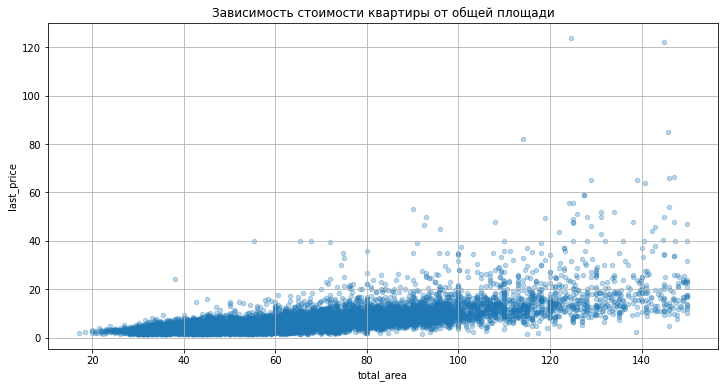

In [78]:
new_data.plot(x ='total_area', y ='last_price',kind='scatter',grid = True,alpha=0.3, figsize=(12,6))
plt.title('Зависимость стоимости квартиры от общей площади');

In [79]:
#посчитаем коэффициент корреляции
new_data['total_area'].corr(new_data['last_price'])

0.6944720423092682

Вывод:Корреляция в 0,65 показывает достаточно высокую зависимость стоимости квартиры от общей площади квартиры

4.3.2. Жилая площадь ('living_area')

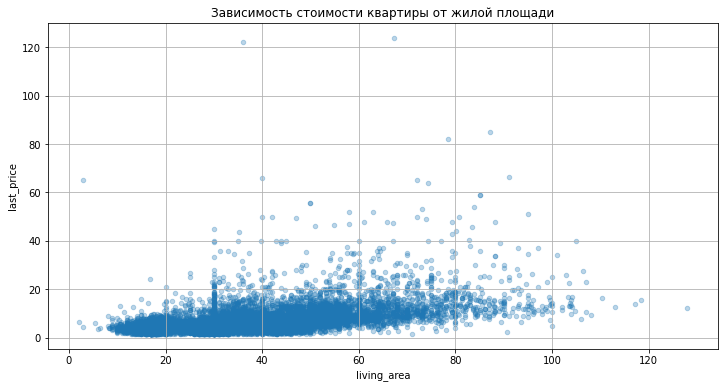

In [80]:
new_data.plot(x ='living_area', y ='last_price',kind='scatter',grid = True,alpha=0.3, figsize=(12,6))
plt.title('Зависимость стоимости квартиры от жилой площади');

In [81]:
#посчитаем коэффициент корреляции
new_data['living_area'].corr(new_data['last_price']);

Вывод:Корреляция в 0,54 показывает наличие связи стоимости квартиры от жилой площади квартиры, однако не такой сильной 

4.3.3. Площадь кухни ('kitchen_area')

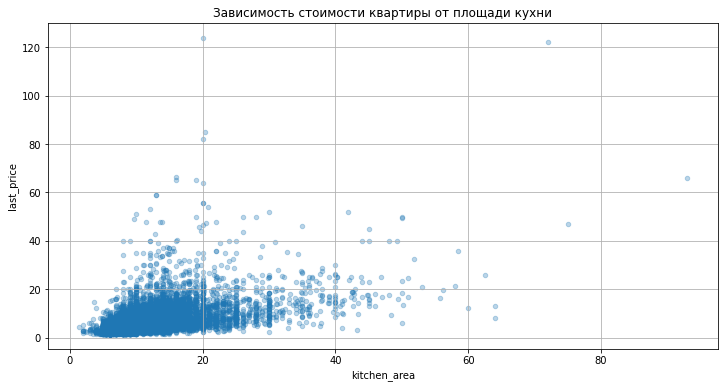

In [82]:
new_data.plot(x ='kitchen_area', y ='last_price',kind='scatter',grid = True,alpha=0.3, figsize=(12,6))
plt.title('Зависимость стоимости квартиры от площади кухни');

In [83]:
#посчитаем коэффициент корреляции
new_data['kitchen_area'].corr(new_data['last_price'])

0.5473520933649609

Вывод:Корреляция в 0,52 показывает наличие связи стоимости квартиры от площади кухни, однако не такой сильной 

4.3.4. Количество комнат ('rooms')

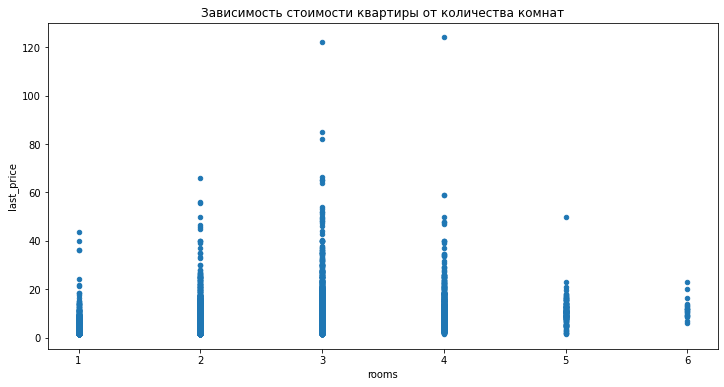

In [84]:
new_data.plot(y='last_price',x='rooms',kind='scatter', figsize=(12,6))
plt.title('Зависимость стоимости квартиры от количества комнат');

In [85]:
#посчитаем коэффициент корреляции
new_data['rooms'].corr(new_data['last_price'])

0.3953101903778958

Вывод:Практически отсутствует зависимость между количеством комнат и общей стоимостью квартиры

4.3.5. Этаж, на котором расположена квартира ('type_floor')

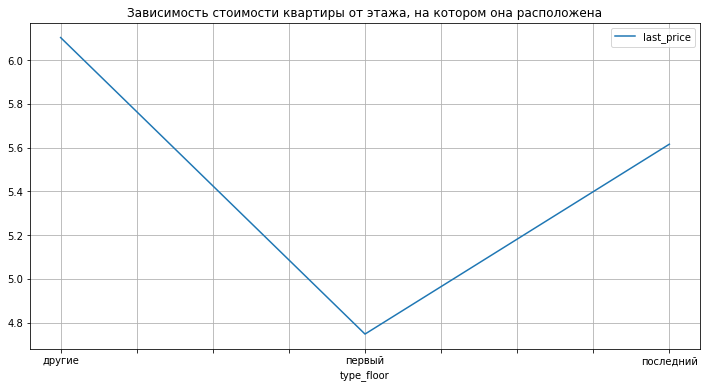

In [86]:
#Построим сводную таблицу по категориям первый, последний и другой,затем по ней построим график
new_data.pivot_table(index = 'type_floor', values = 'last_price').plot(grid = True,figsize = (12,6))
plt.title('Зависимость стоимости квартиры от этажа, на котором она расположена');

Вывод:На первом этаже самые дешевые квартиры

4.3.6. День размещения ('day_publication')

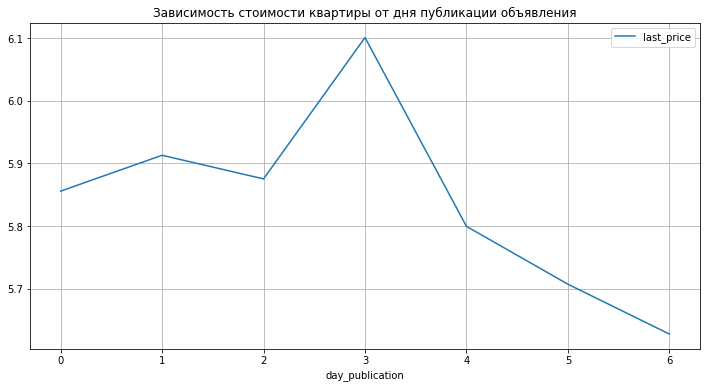

In [87]:
#Построим сводную таблицу по дням размещения,затем по ней построим график
new_data.pivot_table(index = 'day_publication', values = 'last_price').plot(grid = True,figsize = (12,6))
plt.title('Зависимость стоимости квартиры от дня публикации объявления');

Вывод:По графику видно, что в субботу и в четверг размещались объявления с высокой ценой, самая низкая цена была у объявлений, размещенных в пятницу

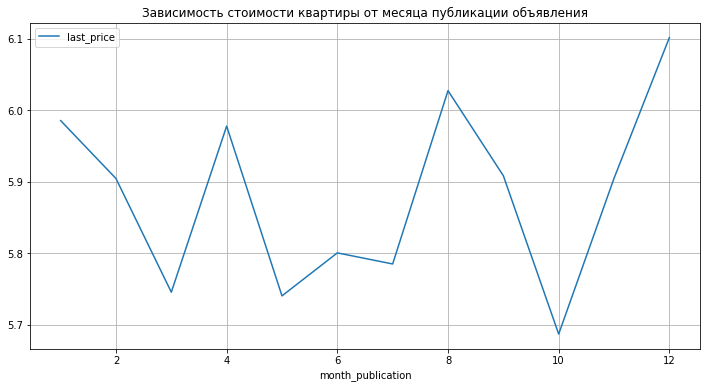

In [88]:
#Построим сводную таблицу по месяцам размещения,затем по ней построим график
new_data.pivot_table(index = 'month_publication', values = 'last_price').plot(grid = True,figsize = (12,6))
plt.title('Зависимость стоимости квартиры от месяца публикации объявления');

    Вывод:Объявления на самые дорогие квартиры размещались в декабре.На мой взгляд это связано с большим спросом на квартиры именно в декабре.Люди вкладывают свои накопления в недвижимость, боясь очередного кризиса

4.3.8. Год размещения ('years_publication')

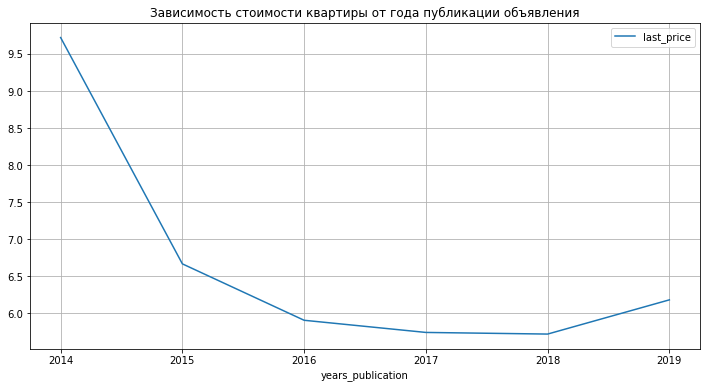

In [89]:
#Построим сводную таблицу по годам размещения,затем по ней построим график
new_data.pivot_table(index = 'years_publication', values = 'last_price').plot(grid = True,figsize = (12,6))
plt.title('Зависимость стоимости квартиры от года публикации объявления');

Вывод:Максимум цен на квартиры был достигнут в 2014 году.Именно в этом году случился кризис и люди стали массово скупать недвижимость, чтобы не потерять свои накопления.До 2018 года цена уменьшалась.Затем произошла стабилизация экономики и постепенно цены на квартиры стали повышаться

По итогам исследования выявились 3 фактора, которые наиболее влияют на общую стоимость квартиры:

- общая площадь

- жилая площадь 

- площадь кухни

Цены на квартиры на первом этаже ниже других

На стоимость квартиры также влияет и год публикации, вернее экономическая ситуация в этот год в стране

4.4.Расчет средней цены 1 кв метра в 10 населенных пунктах с наибольшим числом объявлений.

In [90]:
#выведем 10 населенных пунктов с наибольшим числом объявлений
max_locality_name = new_data['locality_name'].value_counts().head(10)
print(max_locality_name)

Санкт-Петербург    13860
Мурино               479
Шушары               398
Кудрово              389
Всеволожск           354
Пушкин               329
Колпино              321
Парголово            289
Гатчина              289
Выборг               191
Name: locality_name, dtype: int64


In [91]:
#создадим из них список
max_locality_name = ['Санкт-Петербург',    
'Мурино',               
'Кудрово',              
'Шушары',               
'Всеволожск',           
'Пушкин',               
'Колпино' ,             
'Парголово',            
'Гатчина',              
'Выборг']

In [92]:
#построим сводную таблицу 

total_price = (new_data.query('locality_name in @max_locality_name')
.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
.sort_values('price_square_meter', ascending=False))

total_price

,price_square_meter
locality_name,
Санкт-Петербург,111843.937429
Пушкин,103166.004092
Кудрово,95320.029978
Парголово,90691.342386
Мурино,85639.825256
Шушары,78553.400959
Колпино,75129.845412
Гатчина,69450.125298
Всеволожск,69280.445225


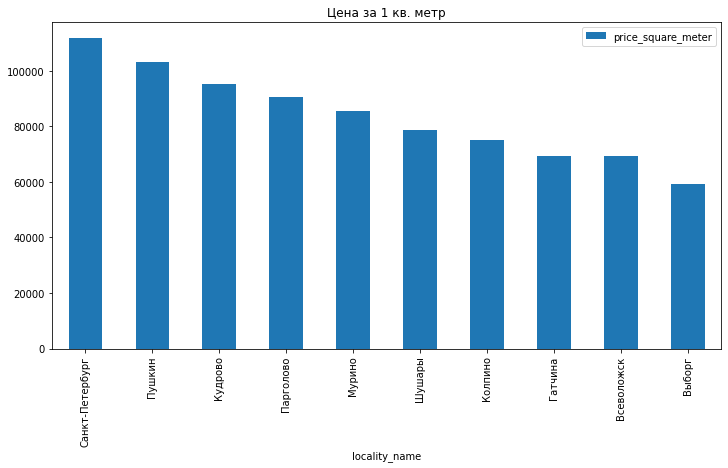

In [93]:
total_price.plot(y = 'price_square_meter',kind = 'bar', figsize = (12,6))
plt.title('Цена за 1 кв. метр');

Вывод:

Как и предполагалась самые дорогие квадратные метр в самом городе Санкт-Петербург(114849 руб/кв.м).После него идут Пушкин(103125 руб/кв.м) и Кудрово(95324 руб/кв.м))

Самые низкие цены за 1 кв. метр в Выборге(58141 руб/кв.м)

4.5.Выявление зависимости стоимости объекта от расстояния до центра города


Text(0.5, 1.0, 'Зависимость стоимости объекта от расстояния до центра')

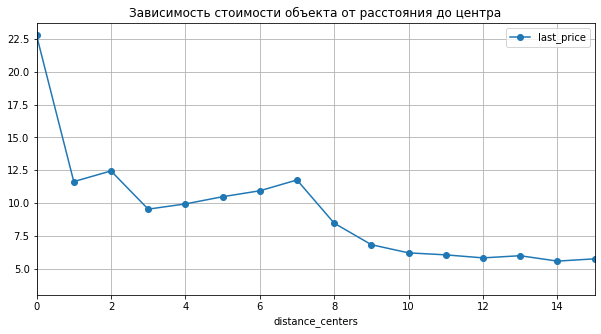

In [94]:
(
    new_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_centers', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость стоимости объекта от расстояния до центра')


Вывод:Самые дорогие квартиры находятся в центре города, начиная с удаления 9 км от центра, стоимость квартиры практически не изменятся

### Напишите общий вывод

При анализе использовались данные продаж сервиса Яндекс.Недвижимость в городе Санкт-Петербурге и соседних населенных пунктах.
При первичном анализе таблицы было выявлено некорректное название столбца 'cityCenters_nearest'и наличия пропусков в столбцах:

is_apartment,           
parks_nearest,          
ponds_nearest ,          
balcony,                 
ceiling_height,          
airports_nearest,        
city_centers_nearest,    
ponds_around3000,        
parks_around3000,        
days_exposition,         
kitchen_area,             
living_area ,             
floors_total,             
locality_name.

Мы провели предобработку данных:
1. В столбце balcony пропуски заменили на 0,
   в столбцах ceiling_height и living_area на медианное значение,
   в столбце is_apartment на False,
   пропуски в столбце locality_name удалили.

   Пропуски в других столбцах оставили без изменений и силу невозможности их логически заменить.
   
2. Изменили в столбцах тип данных: 'balcony' на int и 'first_day_exposition' на date.

3. Привели названия объектов(столбец 'locality_name') к одному виду, чтобы с ними можно бало работать и анализаровать



Для выявления параметров,влияющих на стоимость были добавлены следующие столбцы:

    - цена квадратного метра('cost_square_meter')
    - день публикации объявления('day_publication')
    - месяц публикации объявления('month_publication')
    - год публикации объявления('years_publication')
    - тип этажа квартиры('type_floor')
    - расстояние до центра (км)('distance_centers')
    
В исследовательском анализе данных:
- удалили квартиры с потолками более 6 метров
- оставили данные, где площадь жилая не превышает общую площадь
- оставили данные, где площадь кухни не превышает общую площадь
- удалили квартиры с количеством комнат больше 6 
- удалили квартиры с площадью больше 150 метров

Проведя исследовательский анализ данных по группе параметров можно сделать следующие выводы:
    
    1. Самые продаваемые квартиры площадью от 31 до 60 метров.Это однокомнатные и двухкомнатные.Продажи приблизительно находятся на одном уровне.
    2. Наиболее продаваемые квартры с жилой площадью 30 метров,18 метров  и 17 кв.метров
    3. Самые продаваемые кухни с площадью от 5 до 12 кв. метров.Самые популярные это 6 и 10 кв метров
    4. Квартиры в диапазоне от 3.5 млн до 4.5 млн рублей самые продаваемые.Самые продаваемые квартиры стоят 4.5 млн. рублей
    5. Больше всего продают 1- и 2-комнатных квартир
    6. Наибольшее количество объявлений с высотой потолка от 2.5 метра до 3 метров.
    7. Наибольшее количество объявлений с продажей квартир не на первом и последнем этажах.
    8. Больше всего квартир продается на 5 и 9 этажах.
    9. Больше всего объявлений о продаже квартир, находящихся на расстоянии 11000-15000 метров от центра города и всплекс в   5000 метров от центра города
    10.Наибольшее количество квартир в продаже с расстоянием до парка 400-600 метров

Изучив длительность продажи квартры пришли к выводу:
1. Самая долгая продажа квартиры составила 1580 дней.
2. Средняя продажа квартир составляет 95 дней.
2. Быстрыми продажами можно считать продажи меньше 45 дней.
3. К Долгим продажам относятся продажи больше 231 дня.


По итогам исследования выявились 3 фактора, которые наиболее влияют на общую стоимость квартиры:

- общая площадь

- жилая площадь 

- площадь кухни

Цены на квартиры на первом этаже ниже других

На стоимость квартиры также влияет и год публикации, вернее экономическая ситуация в этот год в стране

Как и предполагалась самые дорогие квадратные метр в самом городе Санкт-Петербург(114849 руб/кв.м).После него идут Пушкин(103125 руб/кв.м) и Кудрово(95324 руб/кв.м))

Самые низкие цены за 1 кв. метр в Выборге(58141 руб/кв.м)
Самые дорогие квартиры находятся в центре города, начиная с удаления 9 км от центра, стоимость квартиры практически не изменятся





**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.